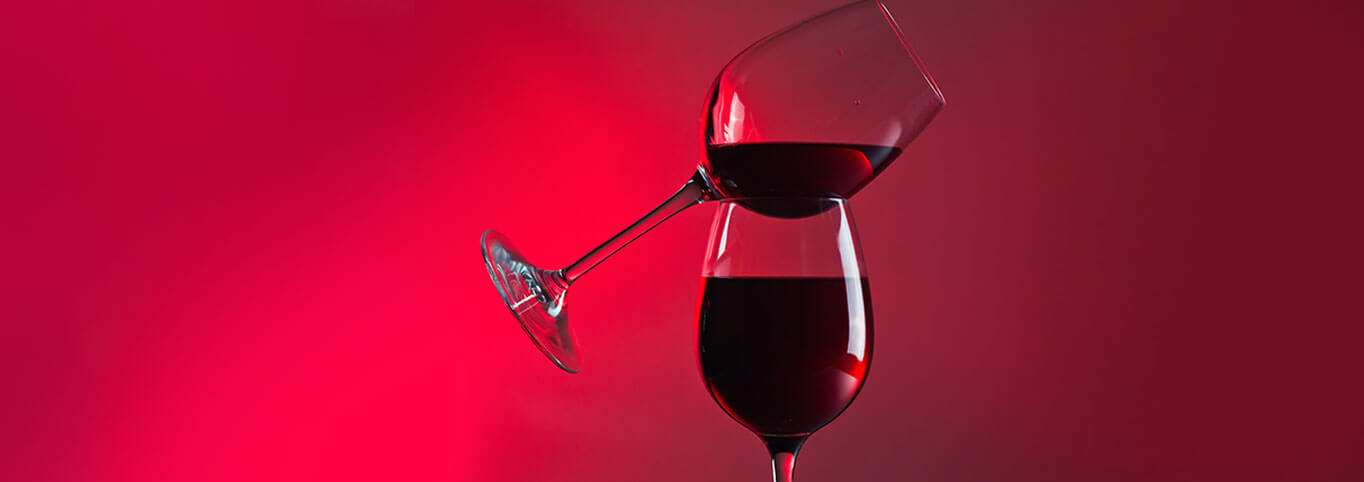

# The Red Wine dataset
## Project 1 - Programing for Data Analysis 
***

<b>Student name: Lais Coletta Pereira </b>

Calendar


29.11 - Modelling and funddata classes
30.11 - funddata assigment and modelling
1.12 - syntesise
2.12 - syntesise
3.12 - finish
4.12 - finish


## Introduction

In this project for the Programing for Data Analysis subject we were asked to:

1) Investigate the types of variables involved, their likely distributions, and their relationships with each other.

2) Synthesise/simulate a data set as closely matching their properties as possible.

3) Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

I chose to analyse the Red Wine dataset because it is a subject I like to research and I have afinity with the terms used in the dataset. I downloaded it from the website kaggle.com (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) and the variables present in this dataset are: 

- fixed acidity: acidity is a characteristic determined by the total sum of acids that a sample contains. Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.

- volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines. 

- residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter. The amount of residual sugar affects a wine's sweetness and, in the EU, the RS level is linked to specific labelling terms.

- chlorides: the amount of salt in the wine.

- free sulfur dioxide: the free sulfites are those available to react and thus exhibit both germicidal and antioxidant properties. 

- total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

- density: the density of water is close to that of water depending on the percent alcohol and sugar content.

- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4. Traditionally, sulfur dioxide (often in the form of potassium metabisulfite) is used to keep wines stable during aging.

- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial. 

- alcohol: this is the percent alcohol content of the wine

- quality: output variable (based on sensory data, score between 3 and 8).

source: https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification

The Red Wine dataset consists of 1599 rows and 12 columns and all variables are numeric and there are no null values in it.

## Import required libraries and modules

In [434]:
#import libraries needed to analyse this dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
from sklearn.preprocessing import StandardScaler, LabelEncoder

#call a function that stops showing the warning boxes in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [435]:
#read dataset and create the 'df' variable
df = pd.read_csv('winequality-red.csv')
print (df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Variables

The <b>input</b> variables available in this dataset are based on physicochemical tests and are:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

The <b>output</b> variable is based on sensory data and will estimate the quality score of the wine between 0 and 10:

12. quality 

## Sumarising the data set

In [436]:
#use the head and tail function to return the first and last 5 rows of the data set and investigate if there are issues with the data base.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [437]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Using the describe() function we can have an overview of this large dataset. This function is used to generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. The definition of each parameter we have when calling this function are:

<i>count - The number of not-empty values;\
mean - The average (mean) value;\
std - The standard deviation;\
min - the minimum value;\
25% - The 25% percentile*;\
50% - The 50% percentile*;\
75% - The 75% percentile*;\
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

 Reference: w3resource.com/pandas/dataframe/dataframe-describe.php) </i>

In [438]:
df.describe ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [439]:
#showing only the mean of each variable
df.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [440]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The pandas isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False.this function there are no missing values, rows or cells for any of the variables in this dataset.

source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

## Analysing the correlation between the variables

In [441]:
#sns.pairplot(df)

Looking at this pairplot, we can see that the histograms in the middle reveal that density and pH are normally distributed (bell curve), however, the other variables are more or less right skewed (long-tailed). The quality dependent variable has a semi-normal discrete distribution.

### Skewness

The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.
If skewness is less than -1 or greater than 1, the distribution is highly skewed.

reference:https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=The%20skewness%20for%20a%20normal,data%20that%20are%20skewed%20right.

Text(0.5, 0, 'Skewness')

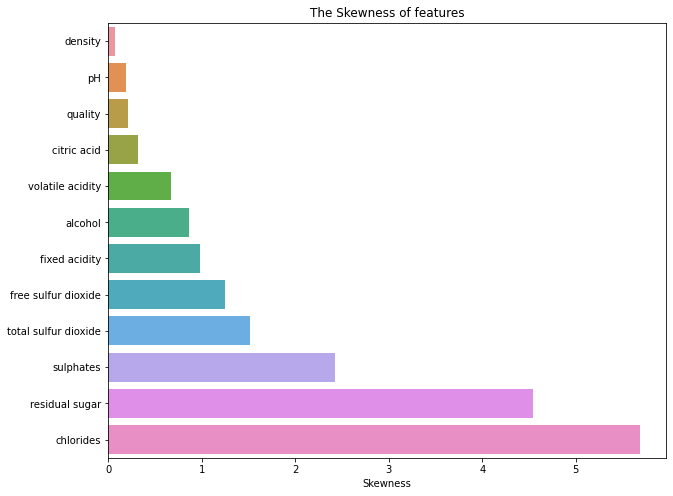

In [442]:
plt.figure(figsize=(10,8))
skewness=df.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.xlabel('Skewness')

### Heatmap for correlation

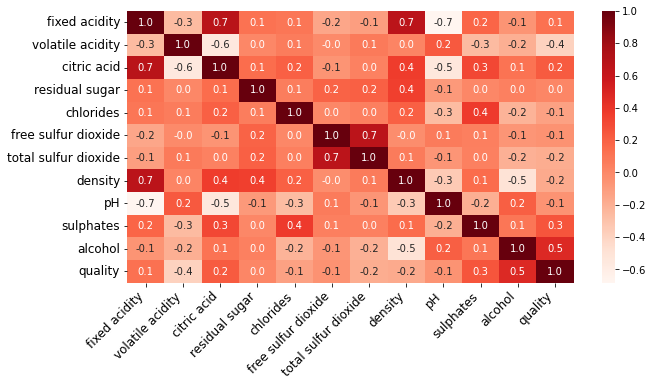

In [443]:
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="Reds")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

In [444]:
#compute pairwise correlation of columns in relation to the quality variable.
correlation = df.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Using the pandas correlation function and the heatmap plot we can observe that the 3 variables that have the highest correlation with our output are: alcohol, sulphates and citric acid.

## Quality 

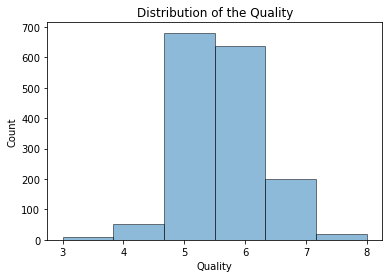

In [445]:
#creating a histogram to analyse the quality distribution of the dataset
plt.hist(df.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

The above quality plot shows the distribution of the quality of the wine in the dataset. The quality range is from 3 to 8 and most of the wines present in the data base are of an average quality (5 and 6 rating).

In [446]:
# numerical representation of the grafic above by checking the value distribution of output ratings
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Comparing quality with variables

### Alcohol vs. Quality

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Alcohol Percentage'),
 Text(0.5, 1.0, 'Alcohol vs. Quality')]

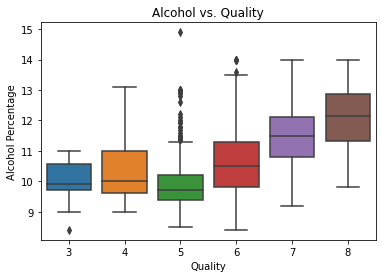

In [447]:
bx = sns.boxplot(x='quality', y='alcohol', data = df)
bx.set(xlabel='Quality', ylabel='Alcohol Percentage', title='Alcohol vs. Quality')

### Sulphates vs Quality

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Sulphate percentage'),
 Text(0.5, 1.0, 'Sulphates vs. Quality')]

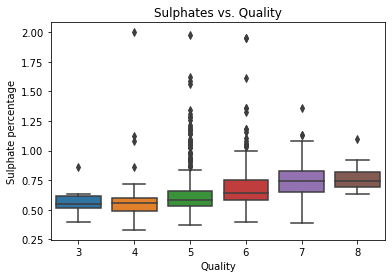

In [448]:
bx = sns.boxplot(x='quality', y='sulphates', data = df)
bx.set(xlabel='Quality', ylabel='Sulphate percentage', title='Sulphates vs. Quality')

### Citric acid vs Quality

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Citric Acid percentage'),
 Text(0.5, 1.0, 'Citric acid vs. Quality')]

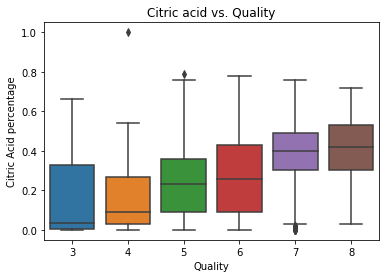

In [449]:
bx = sns.boxplot(x='quality', y='citric acid', data = df)
bx.set(xlabel='Quality', ylabel='Citric Acid percentage', title='Citric acid vs. Quality')

The highest the percentage of those 3 variables, the quality tends to be also higher. This is a strong positive correlation.

### Inputs and Outputs 

Extract and specify what are the inputs and outputs of the data frame:

In [450]:
#input = X
input = df[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
input

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [451]:
#output = Y
output = df[['quality']]
output

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


## Data preprocessing

The first time I ran this classifier algorithm the average accuracy rate was 54%. I am preprocessing the data to improve the algorithm performance. I firstly tried standardization and divinding the output into two classifications and it didn't influence into the accuracy. What worked best was StandardScaler method:

Standardize features by removing the mean and scaling to unit variance. 
class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

Reference: https://www.kaggle.com/code/darthmanav/predicting-wine-quality-using-svm-knn-with-eda

In [452]:
#df['quality']=output
#le = LabelEncoder()
#df['quality']=le.fit_transform(df['quality'])
#sc = StandardScaler()
#input = sc.fit_transform(df.iloc[:,:-1])

In [453]:
scaler = MinMaxScaler()
norm_df = scaler.fit_transform(df.drop("quality", axis = 1))
norm_df = pd.DataFrame(norm_df, columns = df.columns[:-1])

### Classifier

<b>k-nearest neighbors algorithm</b>

​Reference: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm​In 
"The k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set". An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 


Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically. ​Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.​The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.​ A peculiarity of the k-NN algorithm is that it is sensitive to the local structure of the data.​

In [454]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

### Fit

In [455]:
knn.fit(input, output)

KNeighborsClassifier()

### Predict

In [456]:
df.loc[1430]

fixed acidity            7.4000
volatile acidity         0.4100
citric acid              0.2400
residual sugar           1.8000
chlorides                0.0660
free sulfur dioxide     18.0000
total sulfur dioxide    47.0000
density                  0.9956
pH                       3.3700
sulphates                0.6200
alcohol                 10.4000
quality                  5.0000
Name: 1430, dtype: float64

In [457]:
knn.predict([[7.4000,0.4100, 0.2400, 1.8000, 0.0660, 18.0000, 47.0000, 0.9956, 3.3700, 0.6200, 10.4000]])

array([5])

It returns the quality 5 showing that the function is working. 


### Evaluate

In [458]:
(knn.predict(input)==output.values).sum()

982184

In [459]:
#Split Dataset into Train and Test Sets
input_train, input_test, output_train, output_test = mod.train_test_split(input, output, test_size=0.25)
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(input_train, output_train)
output_pred=knn.predict(input_test)
accuracy_score(output_test, output_pred)

0.535

In [460]:
print(classification_report(output_test, output_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.57      0.71      0.63       164
           6       0.51      0.53      0.52       159
           7       0.54      0.23      0.32        57
           8       0.00      0.00      0.00         6

    accuracy                           0.54       400
   macro avg       0.32      0.29      0.29       400
weighted avg       0.51      0.54      0.51       400



In [463]:
#Our accuracies are quite low, so lets try scaling the data.
wine1 = df.drop('quality', axis = 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine1)
input1 = pd.DataFrame(scaled_data)
input1

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [465]:
output1 = df['quality']
output1

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [467]:
input1_train, input1_test, output1_train, output1_test = mod.train_test_split(input, output, test_size=0.25)


In [470]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(input1_train, output1_train)
output1_pred=knn.predict(input1_test)
accuracy_score(output1_test, output1_pred)

0.505